In [27]:
comTime10 = []
# get complete time

for j in range(0,5):
    c_time = []
    for i in range(1,11):
        dir = 'ecfa'+str(i)
        file = open(dir+'/scheduler'+str(j)+'-queue.txt', 'r')
        last_line = file.readlines()[-1]
        c_time.append(float(last_line.split('\t')[0])-1)
#     print(c_time)
    comTime10.append(c_time)
print(comTime10)

[[4.66029, 3.22844, 2.92515, 2.65304, 2.65157, 2.40059, 2.15143, 1.95064, 1.82512, 1.69951], [4.70328, 3.33474, 2.93968, 2.66082, 2.36769, 2.10594, 1.70228, 1.6206200000000002, 1.60119, 1.41331], [4.74364, 3.21528, 2.82802, 2.16141, 2.20339, 2.14483, 1.7147100000000002, 1.62112, 1.6504699999999999, 1.42563], [4.65562, 3.29171, 3.0785799999999997, 2.48137, 2.40791, 2.34433, 2.03463, 1.3110400000000002, 1.08955, 0.9977199999999999], [4.69956, 3.3168800000000003, 2.84246, 2.73394, 2.39801, 2.33659, 2.16143, 1.9350999999999998, 1.8071899999999999, 1.68831]]


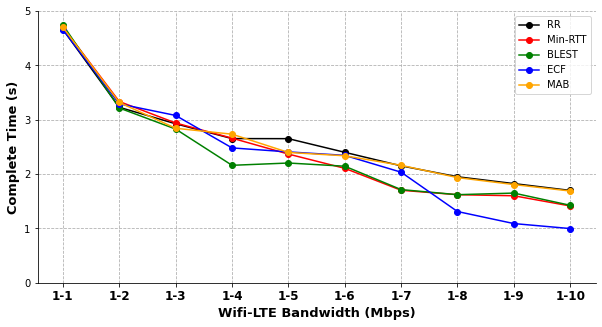

In [29]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


plt.figure(figsize=(10, 5))
plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框


plt.plot(x, comTime10[0], marker='o', color="black", label="RR", linewidth=1.5)
plt.plot(x, comTime10[1], marker='o', color="red", label="Min-RTT", linewidth=1.5)
plt.plot(x, comTime10[2], marker='o', color="green", label="BLEST", linewidth=1.5)
plt.plot(x, comTime10[3], marker='o', color="blue", label="ECF", linewidth=1.5)
plt.plot(x, comTime10[4], marker='o', color="orange", label="MAB", linewidth=1.5)

group_labels = ['1-1', '1-2', '1-3', '1-4', '1-5', '1-6', '1-7', '1-8', '1-9','1-10']  # x轴刻度的标识
plt.xticks(x, group_labels, fontsize=12, fontweight='bold')  # 默认字体大小为10
# plt.yticks(fontsize=12, fontweight='bold')
# # plt.title("example", fontsize=12, fontweight='bold')  # 默认字体大小为12
plt.ylabel("Complete Time (s)", fontsize=13, fontweight='bold')
plt.xlabel("Wifi-LTE Bandwidth (Mbps)", fontsize=13, fontweight='bold')
# plt.xlim(0.9, 6.1)  # 设置x轴的范围
plt.ylim(0, 5)

# # plt.legend()          #显示各曲线的图例
plt.legend(loc=0, numpoints=1)
# leg = plt.gca().get_legend()
# ltext = leg.get_texts()
# plt.setp(ltext, fontsize=12, fontweight='bold')  # 设置图例字体的大小和粗细

# plt.savefig('./ecf_verify.png', format='png')  # 建议保存为svg格式,再用在线转换工具转为矢量图emf后插入word中
plt.show()

In [37]:
x = []
y = []
temp = 0
for j in range(0,5):
    tempx = []
    tempy = []
    dir = 'ecfa10'
    file = open(dir+'/scheduler'+str(j)+'-rx.txt', 'r')
    lines = file.readlines()
    total=int(lines[-1].split('\t')[2])+int(lines[-2].split('\t')[2])
    for line in lines:
        items = line.split('\t')
        if(len(items) < 5):
            continue
        if(int(items[0]) == 1):
#             if (float(items[1]) < 2):
#                 tempx.append(1.99)
#             else:
            tempx.append(float(items[1]))
            temp = int(items[2])
        if(int(items[0]) == 3):
            prec = (temp+int(items[2]))/total*100
            tempy.append(prec)
            temp = 0
    x.append(tempx)
    y.append(tempy)

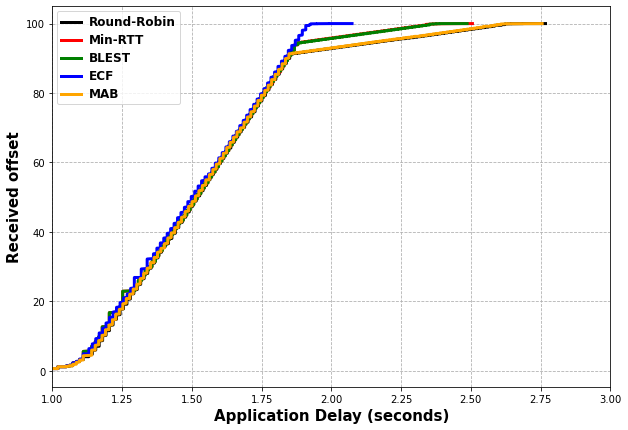

In [41]:
# coding=utf-8

import numpy as np
import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = ['Arial']  # 如果要显示中文字体,则在此处设为：SimHei
# plt.rcParams['axes.unicode_minus'] = False  # 显示负号

# x = np.array([1, 2, 3, 4, 5, 6])
# VGG_supervised = np.array([2.9749694, 3.9357018, 4.7440844, 6.482254, 8.720203, 13.687582])
# VGG_unsupervised = np.array([2.1044724, 2.9757383, 3.7754183, 5.686206, 8.367847, 14.144531])
# ourNetwork = np.array([2.0205495, 2.6509762, 3.1876223, 4.380781, 6.004548, 9.9298])

# label在图示(legend)中显示。若为数学公式,则最好在字符串前后添加"$"符号
# color：b:blue、g:green、r:red、c:cyan、m:magenta、y:yellow、k:black、w:white、、、
# 线型：-  --   -.  :    ,
# marker：.  ,   o   v    <    *    +    1
plt.figure(figsize=(10, 7))
plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
# ax.spines['top'].set_visible(False)  # 去掉上边框
# ax.spines['right'].set_visible(False)  # 去掉右边框


plt.plot(x[0][1:18670], y[0][1:18670],linestyle="-", color="black", label="Round-Robin", linewidth=3)
plt.plot(x[1][1:18670], y[1][1:18670],linestyle="-", color="red", label="Min-RTT", linewidth=3)
plt.plot(x[2][1:18670], y[2][1:18670],linestyle="-", color="green", label="BLEST", linewidth=3)
plt.plot(x[3][1:18670], y[3][1:18670],linestyle="-", color="blue", label="ECF", linewidth=3)
plt.plot(x[4][1:18670], y[4][1:18670],linestyle="-", color="orange", label="MAB", linewidth=3)


# group_labels = ['Top 0-5%', 'Top 5-10%', 'Top 10-20%', 'Top 20-50%', 'Top 50-70%', ' Top 70-100%']  # x轴刻度的标识
# plt.xticks(x, group_labels, fontsize=12, fontweight='bold')  # 默认字体大小为10
# plt.yticks(fontsize=12, fontweight='bold')
# # plt.title("example", fontsize=12, fontweight='bold')  # 默认字体大小为12
plt.ylabel("Received offset", fontsize=15, fontweight='bold')
plt.xlabel("Application Delay (seconds)", fontsize=15, fontweight='bold')
plt.xlim(1, 3)  # 设置x轴的范围
# plt.ylim(50, 101)

# plt.legend()          #显示各曲线的图例
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=12, fontweight='bold')  # 设置图例字体的大小和粗细

# plt.savefig('./rxBytes.png', format='png')  # 建议保存为svg格式,再用在线转换工具转为矢量图emf后插入word中
plt.show()